In [1]:
# Read the file as a pandas data-frame. Python 3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re
from sklearn import preprocessing
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score



In [2]:
data = pd.read_csv('epinions.csv')


In [3]:
# aPerform Label Encoding on ‘class’ column.
label_encoder = preprocessing.LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])


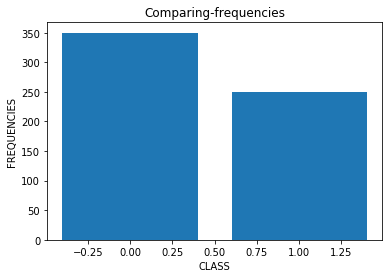

In [4]:
# Plot a bar graph to compare the frequencies of both the classes.
uni = data['class'].value_counts()
## leaving space for another bar too
fig1, ax1 = plt.subplots()
ax1.bar(data['class'].unique(), uni.values)
ax1.set_title('Comparing-frequencies')
ax1.set_xlabel('CLASS')
ax1.set_ylabel('FREQUENCIES')
plt.savefig('compare_frequencies.png')


In [12]:
# preprocess the text
pst = PorterStemmer()
stp_words = stopwords.words('english')
regex = re.compile('[^a-zA-Z]')
new_li = []
for item in data['text']:
    token = word_tokenize(item)
    temp_li = []
    for word in token:
        if word not in stp_words:
            word = pst.stem(word)
            word = (regex.sub('', word))
            temp_li.append(word)
    temp_li = ' '.join(temp_li)
    new_li.append(temp_li)


In [13]:
new_li

['I recent purchas jt moder mile I shop car look paid As former auto technician I know look expect yet everi time I drive car I say self dam great car ye I truli the car afford level style comfort beyond compar price I look number j cover k mile I check see problem show they great basic owner neglect the car extrem quiet smooth yet distanc mild degre sporti perform smooth yet impress yet power well handl brake suspens system similar refin the appoint avail car somewhat spars yet standard qualiti function appar the bose sound system exampl remark output clariti without fanci dial My complaint k mile lack fold rear seat slightli high fuel consumpt I went drive porsch infin feel step style underst perform',
 'I bought product I need instant gratif I stand tortur wait photo come back lab I want pay extravag sum one hour develop the soni mavica perfect solut click happi shutterbug like take lot photo home darkroom interest nuanc tradit photographi the great thing mavica take photo instantli

In [14]:
# Vectorize the text using CountVectorizer
count_vect = CountVectorizer(lowercase = True)
vect = count_vect.fit_transform(new_li)


In [17]:
# Split the dataset into 2 parts namely “train.csv” and “test.csv” having 80% and 20% of the data
x = pd.DataFrame(vect.toarray(), columns = count_vect.get_feature_names())
y = data['class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 42 )  
x

,aa,aaa,aax,ab,abandon,abbrevi,aberr,abil,abl,abound,...,zippi,zippier,zj,zm,zone,zoo,zoom,zoombrows,zoomey,zx
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
596,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
597,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
598,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0.9916666666666667


C:\Users\uru\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[]

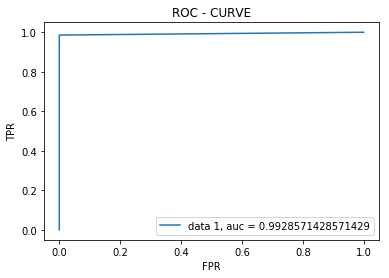

In [18]:
# Train your machine learning algorithm for classification and prepare a model

model = RandomForestClassifier(random_state = 0)
model.fit(x_train, y_train)

# Now test the model on the Test data and evaluate the Performance by providing Confusion Matrix for your model.
print(accuracy_score(y_test, model.predict(x_test)))
matr = (confusion_matrix(y_test, model.predict(x_test)))
np.savetxt('confusion.csv', matr, delimiter = ',')
# Plot ROC Curve
y_proba = model.predict(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)
fig2, ax2 = plt.subplots()
ax2.plot(fpr, tpr, label = 'data 1, auc = '+str(auc))
ax2.legend(loc = 4)
ax2.set_title('ROC - CURVE')
ax2.set_xlabel('FPR')
ax2.set_ylabel('TPR')
plt.savefig('roc_curve')
plt.plot()

In [ ]:
new_li